In [35]:
import pickle

with open('dataframe.pkl', 'rb') as file:
    df = pickle.load(file)

## EDA Rapide

In [36]:
import matplotlib.pyplot as plt

In [37]:
df.head()

,FlagImpaye,Montant,DateTransaction,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,ScoringFP2,...,DiffDateTr3,CA3TRetMtt,CA3TR,Heure,Year,Month,Day,Hour,Minute,Second
0,0,20.00,2017-02-01 07:32:14,1,0,0,0,551,0.000000,0.000000,...,4.0,20.00,0.00,27134,2017,2,1,7,32,14
1,0,20.00,2017-02-01 07:43:37,1,0,0,0,551,0.000000,0.000000,...,4.0,28.61,8.61,27817,2017,2,1,7,43,37
2,0,57.64,2017-02-01 07:47:38,1,0,0,0,549,0.000000,0.000000,...,4.0,57.64,0.00,28058,2017,2,1,7,47,38
3,0,54.29,2017-02-01 07:48:48,0,1,1,1,267,0.000000,0.000000,...,4.0,54.29,0.00,28128,2017,2,1,7,48,48
4,0,26.90,2017-02-01 08:13:27,1,0,0,0,549,0.003769,8.586333,...,4.0,59.15,32.25,29607,2017,2,1,8,13,27


In [38]:
import pandas as pd

table_frequence = df['FlagImpaye'].value_counts()

# Convertissez la série en DataFrame pour une meilleure présentation
table_frequence_df = pd.DataFrame(table_frequence)

# Donnez un nom approprié à la colonne
table_frequence_df.columns = ['Fréquence']

table_frequence_df['Fréquence'] = table_frequence_df['Fréquence'] / table_frequence_df['Fréquence'].sum()
# Affichez le DataFrame de la table de fréquence
print(table_frequence_df)


            Fréquence
FlagImpaye           
0            0.993545
1            0.006455


<Axes: title={'center': 'Count (target)'}, xlabel='FlagImpaye'>

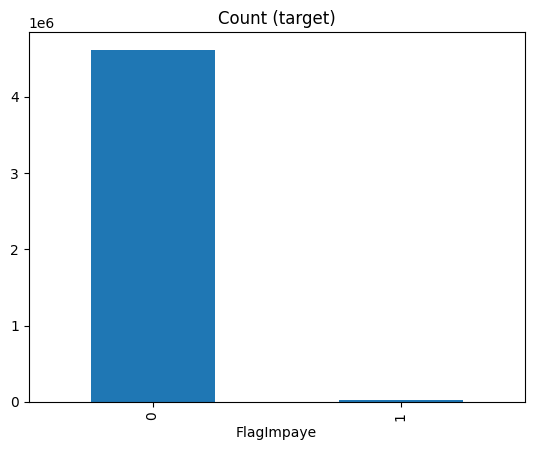

In [39]:
table_frequence.plot(kind='bar', title='Count (target)')

Les données sont fortements déséquilibrées pour la valeur cible 'FlagImpaye'

In [40]:
df.dtypes

FlagImpaye               category
Montant                   float64
DateTransaction    datetime64[ns]
CodeDecision               object
VerifianceCPT1              int32
VerifianceCPT2              int32
VerifianceCPT3              int32
D2CB                        int32
ScoringFP1                float64
ScoringFP2                float64
ScoringFP3                float64
TauxImpNb_RB              float64
TauxImpNB_CPM             float64
EcartNumCheq                int32
NbrMagasin3J                int32
DiffDateTr1               float64
DiffDateTr2               float64
DiffDateTr3               float64
CA3TRetMtt                float64
CA3TR                     float64
Heure                       int32
Year                        int32
Month                       int32
Day                         int32
Hour                        int32
Minute                      int32
Second                      int32
dtype: object

### Je veux diminuer la taille du dataframe car il est bcp trop lourd. Je garde la même proportion de classe de 'FlagImpaye'

In [41]:
from sklearn.model_selection import train_test_split

# Séparez les données en fonction de la variable 'Flagimpaye'
df_pas_utilise, df_reduit = train_test_split(df, test_size=0.1, stratify=df['FlagImpaye'], random_state=42)

# Affichez la taille du sous-DataFrame de test pour vérifier
print("Taille du sous-DataFrame de test :", len(df_reduit))


Taille du sous-DataFrame de test : 464678


In [42]:
table_frequence = df_reduit['FlagImpaye'].value_counts()

# Convertissez la série en DataFrame pour une meilleure présentation
table_frequence_df = pd.DataFrame(table_frequence)

# Donnez un nom approprié à la colonne
table_frequence_df.columns = ['Fréquence']

table_frequence_df['Fréquence'] = table_frequence_df['Fréquence'] / table_frequence_df['Fréquence'].sum()
# Affichez le DataFrame de la table de fréquence
print(table_frequence_df)

            Fréquence
FlagImpaye           
0            0.993544
1            0.006456


In [43]:
df.Heure

0          27134
1          27817
2          28058
3          28128
4          29607
           ...  
4646769    76815
4646770    76969
4646771    77077
4646772    79052
4646773    79633
Name: Heure, Length: 4646773, dtype: int32

In [44]:
df.Hour

0           7
1           7
2           7
3           7
4           8
           ..
4646769    21
4646770    21
4646771    21
4646772    21
4646773    22
Name: Hour, Length: 4646773, dtype: int32

### On définit la partie Train et Test

In [45]:
# Définition des dates limites pour les ensembles d'apprentissage et de test
train_inf = '2017-02-01'
train_sup = '2017-08-31'
test_inf = '2017-09-01'
test_sup = '2017-11-30'

In [46]:
train = df_reduit.loc[(df_reduit['DateTransaction'] >= train_inf) & (df_reduit['DateTransaction'] <= train_sup)]
X_train = train.drop(columns=['FlagImpaye'])
y_train = train['FlagImpaye']

In [47]:
test = df_reduit.loc[(df_reduit['DateTransaction'] >= test_inf) & (df_reduit['DateTransaction'] <= test_sup)]
X_test = test.drop(columns=['FlagImpaye','CodeDecision'])
y_test = test['FlagImpaye']

In [53]:
df_reduit = df_reduit.drop(columns=['DateTransaction'])

In [54]:
df_reduit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 464678 entries, 1628857 to 3285815
Data columns (total 26 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   FlagImpaye      464678 non-null  category
 1   Montant         464678 non-null  float64 
 2   CodeDecision    464678 non-null  object  
 3   VerifianceCPT1  464678 non-null  int32   
 4   VerifianceCPT2  464678 non-null  int32   
 5   VerifianceCPT3  464678 non-null  int32   
 6   D2CB            464678 non-null  int32   
 7   ScoringFP1      464678 non-null  float64 
 8   ScoringFP2      464678 non-null  float64 
 9   ScoringFP3      464678 non-null  float64 
 10  TauxImpNb_RB    464678 non-null  float64 
 11  TauxImpNB_CPM   464678 non-null  float64 
 12  EcartNumCheq    464678 non-null  int32   
 13  NbrMagasin3J    464678 non-null  int32   
 14  DiffDateTr1     464678 non-null  float64 
 15  DiffDateTr2     464678 non-null  float64 
 16  DiffDateTr3     464678 non-null  flo

## On va tester des techniques d'over sampling

### Random Over-sampling

In [ ]:
pip install imblearn

                                              0.0/235.6 kB ? eta -:--:--
     ---------------------------------      204.8/235.6 kB 4.2 MB/s eta 0:00:01
     -------------------------------------- 235.6/235.6 kB 3.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [ ]:
table_frequence2 = y_train_ros.value_counts()

# Convertissez la série en DataFrame pour une meilleure présentation
table_frequence_df2 = pd.DataFrame(table_frequence2)

# Donnez un nom approprié à la colonne
table_frequence_df2.columns = ['Fréquence']

table_frequence_df2['Fréquence'] = table_frequence_df2['Fréquence'] / table_frequence_df2['Fréquence'].sum()
# Affichez le DataFrame de la table de fréquence
print(table_frequence_df2)

            Fréquence
FlagImpaye           
0                 0.5
1                 0.5


<Axes: title={'center': 'Count (target)'}, xlabel='FlagImpaye'>

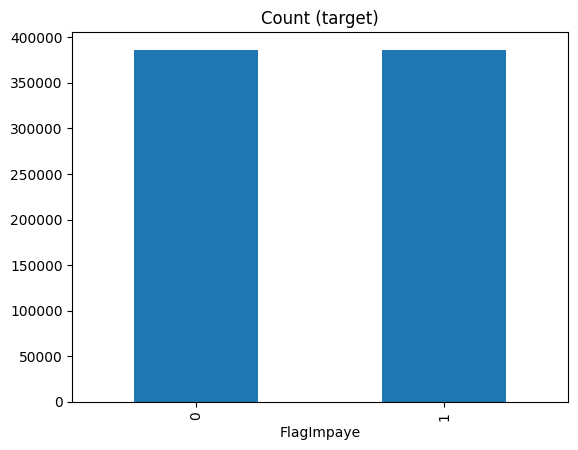

In [ ]:
table_frequence2.plot(kind='bar', title='Count (target)')

## SMOTE-NC (Variables quanti et quali)

In [ ]:
#On enlève la date pcq ça ne passe pas dans le smote. Peut être faut'il la laisser en type 'objet' finalement
X_train = X_train.drop(columns=['DateTransaction'])

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 388491 entries, 1628857 to 3285815
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ZIBZIN                    388491 non-null  object 
 1   IDAvisAutorisationCheque  388491 non-null  object 
 2   Montant                   388491 non-null  float64
 3   CodeDecision              388491 non-null  object 
 4   VerifianceCPT1            388491 non-null  int32  
 5   VerifianceCPT2            388491 non-null  int32  
 6   VerifianceCPT3            388491 non-null  int32  
 7   D2CB                      388491 non-null  int32  
 8   ScoringFP1                388491 non-null  float64
 9   ScoringFP2                388491 non-null  float64
 10  ScoringFP3                388491 non-null  float64
 11  TauxImpNb_RB              388491 non-null  float64
 12  TauxImpNB_CPM             388491 non-null  float64
 13  EcartNumCheq              388491 non-null 

In [ ]:
X_train['ZIBZIN'] = pd.Categorical(X_train['ZIBZIN'])
X_train['IDAvisAutorisationCheque'] = pd.Categorical(X_train['IDAvisAutorisationCheque'])
X_train['CodeDecision'] = pd.Categorical(X_train['CodeDecision'])

In [ ]:
# Importation du package
from imblearn.over_sampling import SMOTENC

# Définition de l'instance SMOTE où 1 désigne la colonne catégorielle
smote = SMOTENC(categorical_features=[0,1,3])

# Application du SMOTE aux données
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

TypeError: Encoders require their input argument must be uniformly strings or numbers. Got ['int', 'str']

## ADASYN

In [ ]:
from imblearn.over_sampling import ADASYN
X_resampled, y_resampled = ADASYN().fit_resample(X_train, y_train)

ValueError: could not convert string to float: 'A069010041908016160050038'